<a href="https://colab.research.google.com/github/Mars1501/Final_work/blob/main/final%20work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЗАДАНИЕ: Провести анализ, найти закономерности и сделать вывод по данным файла train (1).csv.

Каждая строчка наборов данных содержит следующие поля:

Survived — выжил данный пассажир или нет (0 для умерших, 1 для выживших)

Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);

Name — имя;

Sex — пол;

Age — возраст;

SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

Parch — количество родителей, детей (в том числе приемных) на борту Титаника;

Ticket — номер билета;

Fare — плата за проезд;

Cabin — каюта;

Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

In [1]:
import pandas as pd
df = pd.read_csv('train (1).csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Видим, что есть три колонки (Age, Cabin, Embarked), данных в которых меньше, чем 891, т.е. некоторые строки не заполнены. Это можно объяснить, например, так:

у 177 пассажиров нет данных о возрасте, т.к. для покупки билетов в прошлом веке не требовался паспорт или свидетельство о рождении, а данные заполнялись после катастрофы, по тем записям, что уцелели. Если чей-то возраст был не записан, то и получили пустое значение;

у двоих пассажиров порт посадки не заполнен, что по-видимому является случайным пропуском;

каюта не отмечена у большого числа людей - у 687. Видимо эти данные не являлись основными, не сохранились и заполнены только у тех выживших, кто назвал номер своей каюты.

Проверим следующие гипотезы, подверждающие или опровергающие наши предположения:

выведем сначала общее количество выживших и погибших, может номер каюты не смогли назвать погибшие?;

выясним, отмечен ли возраст у всех членов семьи для пассажиров, путешествовавших со своими родственниками. Для этого ВЫВЕДЕМ СНАЧАЛА ПАССАЖИРОВ, ПУТЕШЕСТВОВАВШИХ СЕМЬЕЙ, с колонкой данных об их спасении и возраста. Может, все семейные выжившие назвали свой возраст, а погибшие не смогли этого сделать, отсюда потеря данных.

Далее проведем анализ по количеству выживших среди:

мужчин и женщин,
пассажиров первого и второго классов,
пассажиров, севших на борт в разных портах.
Нарисуем диаграммы для поставленных задач.

In [3]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<BarContainer object of 2 artists>

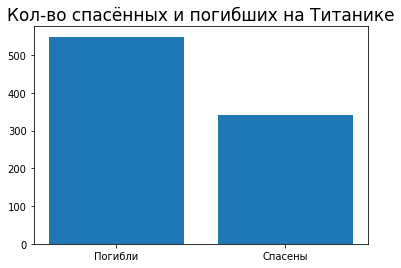

In [4]:
import matplotlib.pyplot as plt

vals = [549, 342]
labels = ['Погибли', 'Спасены']

fig1, ax1 = plt.subplots()
plt.title('Кол-во спасённых и погибших на Титанике', fontsize=17)

plt.bar(labels, vals)

Судя, по количеству погибших = 549, меньшему 687 - числа незаполненных данных по каюте, номер каюты был неизвестен, в том числе, не у всех выживших. Т.е. предполагаем, что не все были с каютами?, плыли в общих местах пользования (палубы?).

In [5]:
df_1 = df[['Name', 'SibSp', 'Age', 'Survived', 'Parch']]
df_1

,Name,SibSp,Age,Survived,Parch
0,"Braund, Mr. Owen Harris",1,22.0,0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0
2,"Heikkinen, Miss. Laina",0,26.0,1,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0
4,"Allen, Mr. William Henry",0,35.0,0,0
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",0,27.0,0,0
887,"Graham, Miss. Margaret Edith",0,19.0,1,0
888,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,0,2
889,"Behr, Mr. Karl Howell",0,26.0,1,0


In [6]:
df_family = df_1.query('Survived >= 1' and 'Parch >= 1')
df_family

,Name,SibSp,Age,Survived,Parch
7,"Palsson, Master. Gosta Leonard",3,2.0,0,1
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,1,2
10,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1
13,"Andersson, Mr. Anders Johan",1,39.0,0,5
16,"Rice, Master. Eugene",4,2.0,0,1
...,...,...,...,...,...
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,47.0,1,1
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,1,1
880,"Shelley, Mrs. William (Imanita Parrish Hall)",0,25.0,1,1
885,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5


Это 213 пассажиров. Среди них 20 без данных о возрасте:

In [7]:
nulls = pd.isnull(df_family['Age']).sum()
nulls

20

Таким образом, среди семейных пассажиров 20 человек были без указания возраста.

Найдем среди семейных пассажиров "без возраста" количество погибших.

Сначала выведем число спасшихся и погибших среди "семейных":

In [8]:
df_2 = df_family[['Name', 'Age', 'Survived']]
df_2.query('Survived == 1')

,Name,Age,Survived
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,1
10,"Sandstrom, Miss. Marguerite Rut",4.0,1
25,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",38.0,1
43,"Laroche, Miss. Simonne Marie Anne Andree",3.0,1
58,"West, Miss. Constance Mirium",5.0,1
...,...,...,...
858,"Baclini, Mrs. Solomon (Latifa Qurban)",24.0,1
869,"Johnson, Master. Harold Theodor",4.0,1
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,1
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,1


In [9]:
df_2.query('Survived == 0')

,Name,Age,Survived
7,"Palsson, Master. Gosta Leonard",2.0,0
13,"Andersson, Mr. Anders Johan",39.0,0
16,"Rice, Master. Eugene",2.0,0
24,"Palsson, Miss. Torborg Danira",8.0,0
27,"Fortune, Mr. Charles Alexander",19.0,0
...,...,...,...
850,"Andersson, Master. Sigvard Harald Elias",4.0,0
852,"Boulos, Miss. Nourelain",9.0,0
863,"Sage, Miss. Dorothy Edith ""Dolly""",NaN,0
885,"Rice, Mrs. William (Margaret Norton)",39.0,0


Видим: у 15 человек среди погибших и 5 среди выживших неизвестен возраст. Значит наше предположение о том, что пассажиров, у которых неизвестен возраст, больше среди погибших, верно.

Наконец, построим диаграммы спасенных:

среди мужчин и женщин;

кают разного класса;

путешественников, севших на борт в разных портах.

Выведем новый фрейм - всех выживших, и столбцы 'Name', 'Sex', 'Pclass', 'Embarked'

In [10]:
d_2 = df.groupby("Survived").get_group(1).reset_index(drop = True)
d_3 = d_2[['Name', 'Sex', 'Pclass', 'Embarked']]
d_3

,Name,Sex,Pclass,Embarked
0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,C
1,"Heikkinen, Miss. Laina",female,3,S
2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,S
3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,3,S
4,"Nasser, Mrs. Nicholas (Adele Achem)",female,2,C
...,...,...,...,...
337,"Najib, Miss. Adele Kiamie ""Jane""",female,3,C
338,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,1,C
339,"Shelley, Mrs. William (Imanita Parrish Hall)",female,2,S
340,"Graham, Miss. Margaret Edith",female,1,S


In [11]:
d_3.Sex.value_counts()

female    233
male      109
Name: Sex, dtype: int64

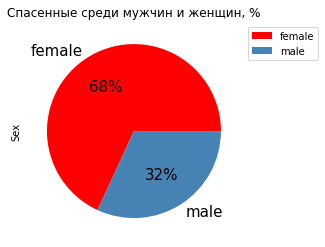

In [12]:
import matplotlib.pyplot as plt

vals = [233, 109]
labels = ["female", "male"]

d_3.Sex.str.get_dummies().sum().plot.pie(label='Sex', autopct='%1.0f%%', \
                                         colors = ['red', 'steelblue'],\
                                         title='Спасенные среди мужчин и женщин, %', fontsize=15)\
                                         .legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))


In [13]:
d_3.Pclass.value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

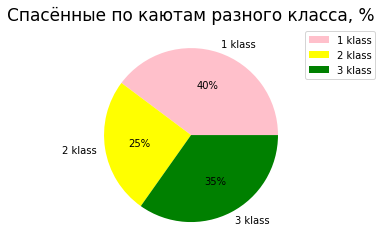

In [14]:
import matplotlib.pyplot as plt

vals = [136, 87, 119]
labels = ['1 klass', '2 klass', '3 klass']

fig1, ax1 = plt.subplots()
plt.title('Спасённые по каютам разного класса, %', fontsize=17)
ax1.pie(vals, labels=labels, autopct='%1.0f%%', colors = ['pink', 'yellow', 'green'])
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0));

plt.show()

In [15]:
d_4 = d_2[['Name', 'Embarked']]
d_4

,Name,Embarked
0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C
1,"Heikkinen, Miss. Laina",S
2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S
3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",S
4,"Nasser, Mrs. Nicholas (Adele Achem)",C
...,...,...
337,"Najib, Miss. Adele Kiamie ""Jane""",C
338,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",C
339,"Shelley, Mrs. William (Imanita Parrish Hall)",S
340,"Graham, Miss. Margaret Edith",S


In [16]:
d_4.Embarked.value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

<BarContainer object of 3 artists>

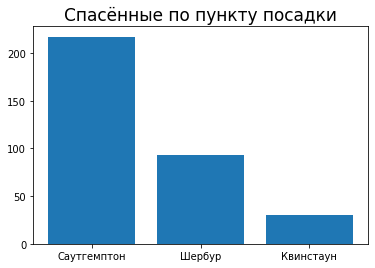

In [17]:
import matplotlib.pyplot as plt

vals = [217, 93, 30]
labels = ['Саутгемптон', 'Шербур', 'Квинстаун']

fig1, ax1 = plt.subplots()
plt.title('Спасённые по пункту посадки', fontsize=17)

plt.bar(labels, vals)

Итак, по полученным данным мы можем сделать вывод: большее число спасенных (примерно в 2 раза больше, чем севших в Шербурге, и почти в 7 раз, чем в Квингстауне) - сели на Титаник в Саунтгемптоне. Но и общее число пассажиров село больше всего в этом порту и погибло:

In [18]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<BarContainer object of 3 artists>

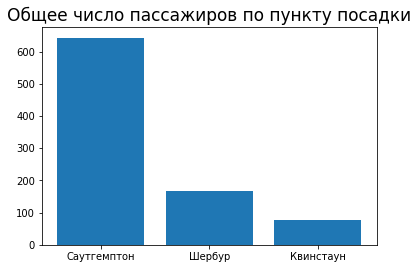

In [20]:
import matplotlib.pyplot as plt

vals = [644, 168, 77]
labels = ['Саутгемптон', 'Шербур', 'Квинстаун']

fig1, ax1 = plt.subplots()
plt.title('Общее число пассажиров по пункту посадки', fontsize=17)

plt.bar(labels, vals)

И большее число погибших - также с пунктом посадки в Саунтгемптоне.